## Кластеризация футболистов

In [36]:
from sklearn import metrics, cluster
import pandas as pd
import numpy as np


def process(df: pd.DataFrame):
    features = [col for col in df.columns if col not in ['ID', 'Best Position']]
    model = cluster.KMeans(n_clusters=10, random_state=123)
    df["Pred"] = model.fit_predict(df[features])
    return df[df["Pred"] == np.argmax(np.bincount(df["Pred"]))]["Best Position"].mode().iloc[0]


def process_(df: pd.DataFrame):
    features = [col for col in df.columns if col not in ['ID', 'Best Position', 'Pred']]
    
    model = cluster.KMeans(n_clusters=10, random_state=123)
    df["Pred"] = model.fit_predict(df[features])

    counts = np.bincount(df["Pred"])
    n_max_clust = np.argmax(counts)
    
    closest, _ = metrics.pairwise_distances_argmin_min(model.cluster_centers_, df[features])
    # return df.iloc[[closest[n_max_clust]]]["Best Position"].iloc[0]
    
    return df[df["Pred"] == n_max_clust]["Best Position"].mode().iloc[0]

In [27]:
from IPython.display import display
import matplotlib.pyplot as plt

df = pd.read_csv('footbal_players_clust.csv')
# df.reset_index(drop=True, inplace=True)

df.info()
display(df.describe())
# display(df.mode().iloc[0])

features = [col for col in df.columns if col not in ['ID', 'Best Position', 'Pred']]

all_pos = df["Best Position"].unique()
print(all_pos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16684 entries, 0 to 16683
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16684 non-null  int64  
 1   Best Position    16684 non-null  object 
 2   Crossing         16684 non-null  float64
 3   Finishing        16684 non-null  float64
 4   HeadingAccuracy  16684 non-null  float64
 5   ShortPassing     16684 non-null  float64
 6   Volleys          16684 non-null  float64
 7   Dribbling        16684 non-null  float64
 8   Curve            16684 non-null  float64
 9   FKAccuracy       16684 non-null  float64
 10  LongPassing      16684 non-null  float64
 11  BallControl      16684 non-null  float64
 12  Acceleration     16684 non-null  float64
 13  SprintSpeed      16684 non-null  float64
 14  Agility          16684 non-null  float64
 15  Reactions        16684 non-null  float64
 16  Balance          16684 non-null  float64
 17  ShotPower   

,ID,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
count,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,...,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000,16684.000000
mean,223974.377547,50.628866,46.947075,52.711820,59.557360,43.879585,56.998262,48.381863,43.251139,53.355670,...,64.649065,63.102433,64.533565,47.862863,55.776852,46.150503,51.340146,54.394510,49.190242,58.890674
std,28803.379413,18.004854,19.436913,16.990448,14.341094,17.665183,18.419074,18.177886,17.238054,15.124272,...,11.656949,15.440593,12.715502,19.111544,17.154397,20.859395,19.223066,13.918946,15.622614,12.143043
min,16.000000,6.000000,3.000000,6.000000,7.000000,3.000000,4.000000,4.000000,5.000000,5.000000,...,17.000000,11.000000,20.000000,4.000000,2.000000,3.000000,2.000000,9.000000,6.000000,12.000000
25%,211142.500000,39.000000,32.000000,45.000000,54.000000,31.000000,51.000000,36.000000,31.000000,44.000000,...,58.000000,56.000000,57.000000,34.000000,44.000000,25.000000,42.000000,45.000000,40.000000,51.000000
50%,230852.000000,55.000000,51.000000,55.000000,63.000000,45.000000,62.000000,50.000000,42.000000,56.000000,...,65.000000,66.000000,66.000000,52.000000,58.000000,51.000000,56.000000,56.000000,50.000000,60.000000
75%,243831.750000,64.000000,63.000000,65.000000,69.000000,57.000000,69.000000,62.000000,56.000000,64.000000,...,72.000000,73.000000,74.000000,63.000000,69.000000,64.000000,65.000000,65.000000,61.000000,67.000000
max,256488.000000,94.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,95.000000,97.000000,97.000000,94.000000,95.000000,93.000000,95.000000,94.000000,92.000000,96.000000


ID                   16
Best Position        CB
Crossing           65.0
Finishing          58.0
HeadingAccuracy    58.0
ShortPassing       62.0
Volleys            49.0
Dribbling          65.0
Curve              60.0
FKAccuracy         39.0
LongPassing        58.0
BallControl        65.0
Acceleration       68.0
SprintSpeed        69.0
Agility            68.0
Reactions          60.0
Balance            68.0
ShotPower          68.0
Jumping            70.0
Stamina            68.0
Strength           68.0
LongShots          58.0
Aggression         68.0
Interceptions      60.0
Positioning        58.0
Vision             58.0
Penalties          55.0
Composure          60.0
Name: 0, dtype: object

In [37]:
process(df)

'CDM'

In [139]:
df.groupby(by="Best Position").mean()

,ID,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
Best Position,,,,,,,,,,,,,,,,,,,,,
CAM,228677.480948,58.977230,59.019981,48.364777,67.972119,54.391729,68.761152,61.343866,56.644981,62.966543,...,59.264870,62.390799,55.507435,60.537639,51.841078,41.734201,62.177974,65.899628,56.968401,63.395446
CB,222583.030665,42.145578,32.042285,65.595223,58.661072,33.161394,47.028405,37.497740,34.796643,53.000323,...,70.661394,64.183667,75.120723,35.505487,67.577469,64.821498,37.159458,43.042285,41.926081,58.637508
CDM,221172.954948,53.994368,46.122285,57.818182,69.210780,44.703942,61.674175,51.659694,48.620274,66.062751,...,66.675784,72.995977,69.000000,53.807723,70.232502,66.382944,53.498793,61.561545,50.700724,62.868061
CF,207262.500000,56.225806,69.483871,61.387097,66.338710,65.935484,72.790323,65.225806,56.838710,55.048387,...,64.548387,64.612903,59.483871,66.338710,52.322581,30.596774,71.064516,66.967742,66.903226,67.112903
CM,214962.336777,60.678719,55.199380,55.243802,71.952479,53.105372,66.996901,60.780992,57.691116,69.522727,...,63.517562,72.195248,64.422521,62.266529,65.293388,63.104339,61.951446,68.287190,56.613636,66.165289
GK,219786.724181,13.919604,11.226964,14.142857,27.179344,11.518244,13.431664,14.461348,14.133581,26.198516,...,57.533086,29.777984,59.894249,11.770563,25.536178,15.964750,10.369202,38.295609,19.212121,42.460730
LB,226952.527972,63.193473,39.078089,55.853147,60.376457,37.900932,61.448718,51.581585,43.817016,53.286713,...,66.402098,70.526807,62.685315,43.799534,61.990676,62.385781,53.770396,50.460373,44.878788,57.315851
LM,225695.827500,63.830000,58.615000,48.148750,64.001250,52.732500,68.412500,59.453750,52.938750,58.410000,...,60.682500,67.640000,57.070000,56.793750,51.000000,40.036250,61.792500,61.196250,55.460000,60.092500
LW,221668.324873,64.197970,63.761421,49.152284,64.197970,57.868020,71.918782,61.111675,52.888325,54.786802,...,60.218274,61.634518,54.299492,61.781726,48.319797,31.121827,64.289340,62.817259,59.817259,62.517766


In [8]:
model = cluster.KMeans(n_clusters=10, random_state=123)

df["Pred"] = model.fit_predict(df[features])

pd.pivot_table(df, index=["Best Position"], columns=["Pred"], aggfunc={"ID": "count"})

ID                                                       \
Pred               0       1       2      3       4       5      6      7   
Best Position                                                               
CAM            415.0     NaN    13.0  266.0     NaN     NaN   69.0  135.0   
CB               2.0     NaN     NaN  187.0  1255.0  1126.0  293.0  233.0   
CDM              1.0     NaN     NaN  453.0     6.0   103.0  177.0  490.0   
CF              12.0     NaN     6.0    NaN     NaN     NaN    NaN    1.0   
CM               8.0     NaN     1.0  296.0     NaN     2.0   65.0  394.0   
GK               NaN  1617.0     NaN    NaN     NaN     NaN    NaN    NaN   
LB               1.0     NaN     NaN  301.0     3.0    10.0  347.0  175.0   
LM             158.0     NaN     5.0   98.0     NaN     NaN   24.0   61.0   
LW              47.0     NaN     5.0    3.0     NaN     NaN    2.0    2.0   
LWB              NaN     NaN     NaN  107.0     NaN     NaN   60.0   76.0   
RB               NaN     NaN     NaN  290.0     7.0     4.0  350.0  170.0   
RM             395.0     NaN    14.0  202.0     NaN     NaN   81.0   78.0   
RW              74.0     NaN     7.0    6.0     NaN     NaN    NaN    7.0   
RWB              NaN     NaN     NaN  128.0     NaN     NaN   53.0   65.0   
ST             656.0     NaN  1323.0   22.0     1.0     2.0    3.0   45.0   

                             
Pred               8      9  
Best Position                
CAM            535.0  719.0  
CB               2.0    NaN  
CDM             13.0    NaN  
CF              26.0   17.0  
CM             193.0    9.0  
GK               NaN    NaN  
LB              19.0    2.0  
LM             140.0  314.0  
LW              45.0   93.0  
LWB              7.0    2.0  
RB              13.0    2.0  
RM             153.0  571.0  
RW              64.0  143.0  
RWB              7.0    5.0  
ST             312.0  184.0

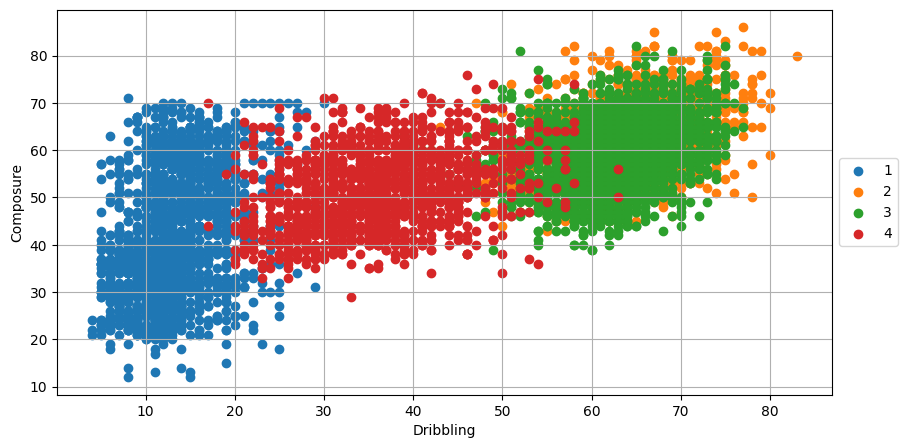

In [141]:
f1, f2 = np.random.choice(a=features, size=2)
# print(f1, f2)

plt.figure(figsize=(10, 5))
plt.xlabel(f1)
plt.ylabel(f2)
for select in [1, 2, 3, 4]:  # range(10):
    sub_df = df[df["Pred"] == select]#.sample(n=500, random_state=123, axis=0)
    plt.scatter(sub_df[f1], sub_df[f2], label=select)

plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

In [5]:
df.head(10)

,ID,Best Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Pred
0,176580,ST,80.0,91.0,83.0,82.0,90.0,85.0,86.0,82.0,...,82.0,86.0,86.0,87.0,41.0,92.0,84.0,83.0,85.0,8
1,194765,CF,83.0,89.0,84.0,85.0,87.0,88.0,86.0,85.0,...,87.0,63.0,83.0,73.0,49.0,90.0,86.0,86.0,89.0,8
2,212198,CAM,87.0,77.0,58.0,86.0,86.0,85.0,86.0,87.0,...,94.0,67.0,89.0,70.0,74.0,83.0,88.0,90.0,86.0,8
3,192985,CAM,94.0,82.0,55.0,92.0,82.0,87.0,85.0,83.0,...,89.0,74.0,90.0,76.0,63.0,88.0,94.0,82.0,91.0,8
4,224334,LB,87.0,66.0,57.0,81.0,68.0,87.0,88.0,78.0,...,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,8
5,212462,LWB,90.0,65.0,67.0,84.0,67.0,82.0,87.0,79.0,...,91.0,68.0,83.0,78.0,80.0,75.0,76.0,81.0,78.0,8
6,187961,CM,67.0,85.0,85.0,83.0,75.0,83.0,66.0,75.0,...,92.0,82.0,80.0,81.0,80.0,84.0,84.0,71.0,81.0,8
7,178518,CDM,73.0,75.0,59.0,85.0,75.0,83.0,73.0,68.0,...,89.0,76.0,88.0,88.0,86.0,84.0,80.0,63.0,84.0,8
8,197445,CB,82.0,63.0,76.0,82.0,68.0,79.0,78.0,85.0,...,85.0,75.0,80.0,69.0,82.0,76.0,77.0,79.0,80.0,8
9,181872,CB,76.0,75.0,82.0,82.0,78.0,76.0,76.0,68.0,...,86.0,83.0,82.0,93.0,85.0,83.0,82.0,81.0,83.0,8


In [22]:
labels = df["Pred"]
counts = np.bincount(labels)
n_max_clust = np.argmax(counts)

print(counts, np.max(counts), np.argmax(counts))

closest, _ = metrics.pairwise_distances_argmin_min(model.cluster_centers_, df[features],
                                                   metric='euclidean')

print(closest)
for i in range(10):
    print(i, df.iloc[[closest[i]]]["Best Position"].iloc[0], closest[i], sep="\t")
    
display(df.iloc[[closest[n_max_clust]]])

[1769 1617 1374 2359 1272 1247 1524 1932 1529 2061] 2359 3
[12341 15787  8472  6999 14045  7219 12637  2055  1101  6156]
0	RM	12341
1	GK	15787
2	ST	8472
3	LM	6999
4	CB	14045
5	CB	7219
6	RB	12637
7	CM	2055
8	CAM	1101
9	RM	6156


,ID,Best Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Pred
6999,213690,LM,58.0,45.0,53.0,62.0,40.0,58.0,54.0,43.0,...,66.0,62.0,52.0,62.0,54.0,55.0,58.0,46.0,58.0,3


In [23]:
model.cluster_centers_
# df.head(10)

array([[46.55002826, 54.60146976, 46.0638779 , 54.10910119, 45.87563595,
        59.04013567, 46.32108536, 39.75522894, 45.32843414, 58.55228943,
        70.1910684 , 69.66591295, 67.04522329, 51.79310345, 69.80610514,
        55.29112493, 57.28886376, 55.10740531, 52.26851328, 48.522329  ,
        39.22442058, 24.2035048 , 53.7133974 , 51.80723573, 53.08762012,
        51.34708875],
       [13.91960421, 11.22696351, 14.14285714, 27.17934447, 11.51824366,
        13.43166357, 14.46134818, 14.13358071, 26.19851577, 19.49288806,
        37.21706865, 37.2585034 , 39.46072975, 58.48917749, 42.39579468,
        45.18985776, 57.53308596, 29.77798392, 59.89424861, 11.77056277,
        25.53617811, 15.96474954, 10.36920223, 38.29560915, 19.21212121,
        42.46072975],
       [46.45083758, 68.7006555 , 67.90313183, 59.8390386 , 61.33357611,
        64.12454479, 51.52439913, 43.002185  , 45.26729789, 65.87327021,
        66.61398398, 68.76110706, 63.94173343, 63.87327021, 59.74289876,
       